### 1) Importing the Important Modules

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

### The Code Given Below Tells to Computer that I will not be using my Entire GPU power. Just use till maximum of 60%

In [35]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### 2) Preprocessing the training Data using ImageDataGenerator
- #### One of the methods to prevent overfitting is to have more data. By this, our model will be exposed to more aspects of data and thus will generalize better. To get more data, either you manually collect data or generate data from the existing data by applying some transformations. The latter method is known as Data Augmentation.

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "../input/cat-and-dog/training_set/training_set/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )


Found 8005 images belonging to 2 classes.


In [37]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "../input/cat-and-dog/test_set/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 2 classes.


### 3) Creating the Model

### Importing useful models for CNN Layers

In [38]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [39]:
from tensorflow.keras.regularizers import l2

In [40]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

### Step 2 - Pooling
Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

In [42]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening
**Flattens the input. Does not affect the batch size.**

**Note:** If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

In [44]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [45]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [46]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

### Printing out the summary of the Layers

In [47]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

## Training the CNN

### Compiling the CNN

In [48]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

### 4) Training the CNN 

In [49]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
251/251 [==============================] - 47s 183ms/step - loss: 0.8843 - accuracy: 0.5808 - val_loss: 0.7283 - val_accuracy: 0.6826
Epoch 2/15
251/251 [==============================] - 46s 184ms/step - loss: 0.7118 - accuracy: 0.6708 - val_loss: 0.7508 - val_accuracy: 0.7004
Epoch 3/15
251/251 [==============================] - 45s 179ms/step - loss: 0.6463 - accuracy: 0.7002 - val_loss: 0.6174 - val_accuracy: 0.6980
Epoch 4/15
251/251 [==============================] - 45s 180ms/step - loss: 0.6209 - accuracy: 0.7067 - val_loss: 0.6022 - val_accuracy: 0.6995
Epoch 5/15
251/251 [==============================] - 45s 178ms/step - loss: 0.5950 - accuracy: 0.7243 - val_loss: 0.5710 - val_accuracy: 0.7494
Epoch 6/15
251/251 [==============================] - 49s 196ms/step - loss: 0.5622 - accuracy: 0.7375 - val_loss: 0.5622 - val_accuracy: 0.7701
Epoch 7/15
251/251 [==============================] - 49s 197ms/step - loss: 0.5479 - accuracy: 0.7455 - val_loss: 0.5573 - val_ac

### 5) Ploting the Train loss,val loss and train acc, val acc

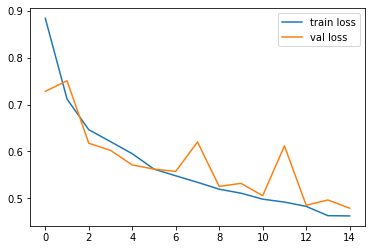

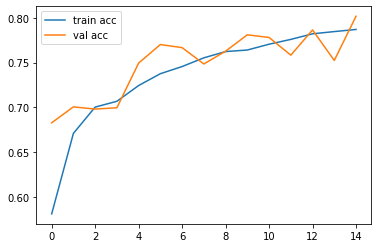

In [50]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

### 6) Saving the trained model

In [51]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

### 7) Taking the image from the test set and checking our models predictions

In [57]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

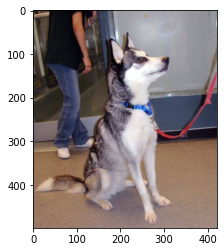

In [66]:
from PIL import Image
path = '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg'
img = Image.open(path)

plt.imshow(img)
plt.show()

In [59]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog


# Conclusion
## This notebook has used SVM with CNN to do image classification on cats and dogs, for My third task in Prodigy Infotech, feel free to make any changes in the code or fix any bugs if found